<a href="https://colab.research.google.com/github/NeeBot/Kbot/blob/master/%EB%94%B0%EB%A6%89%EC%9D%B4_%EC%8B%A4%EC%8A%B5%ED%8C%8C%EC%9D%BC_(%EA%B5%90%EC%9C%A1%EC%83%9D_%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# EDA

In [ ]:
# 상위 5개의 데이터 미리보기
train.head(10)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
6,14,3,10.6,0.0,1.5,58.0,1548.0,0.038,62.0,33.0,23.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
8,19,9,13.8,0.0,1.9,64.0,1344.0,0.039,93.0,19.0,39.0
9,20,14,17.2,0.0,2.1,32.0,1571.0,0.025,64.0,19.0,83.0


In [ ]:
# 하위 5개의 데이터 미리보기 -> 테스트 데이터라 count 데이터 없음
test.tail(10)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
705,2141,17,27.8,0.0,1.5,27.0,2000.0,0.068,27.0,17.0
706,2143,2,21.0,0.0,2.3,70.0,724.0,0.034,44.0,34.0
707,2145,0,20.0,0.0,1.5,66.0,1549.0,0.031,34.0,21.0
708,2146,3,21.6,0.0,2.6,41.0,2000.0,0.044,25.0,16.0
709,2147,18,24.3,0.0,4.1,46.0,1246.0,0.063,35.0,28.0
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0
714,2177,8,22.3,0.0,1.0,63.0,1277.0,0.007,30.0,24.0


In [ ]:
submission = pd.read_csv('submission.csv')
submission.tail()

,id,count
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN
714,2177,NaN


In [ ]:
# 행 갯수, 열 갯수(count of column)
train.shape

(1459, 11)

In [ ]:
# 행 갯수, 열갯수(count of column)
test.shape

(715, 10)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
# 자주 사용하는 결측치 확인 방법 -> 기억해두기
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


## 시각화 해보기

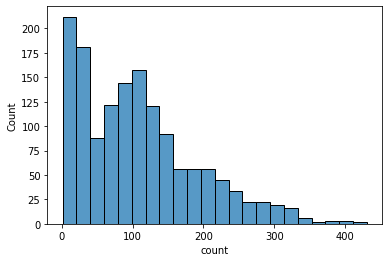

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히스토그램
sns.histplot(x = train['count'])

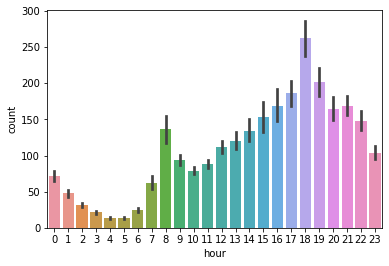

In [ ]:
sns.barplot(x = 'hour', y = 'count', data = train)

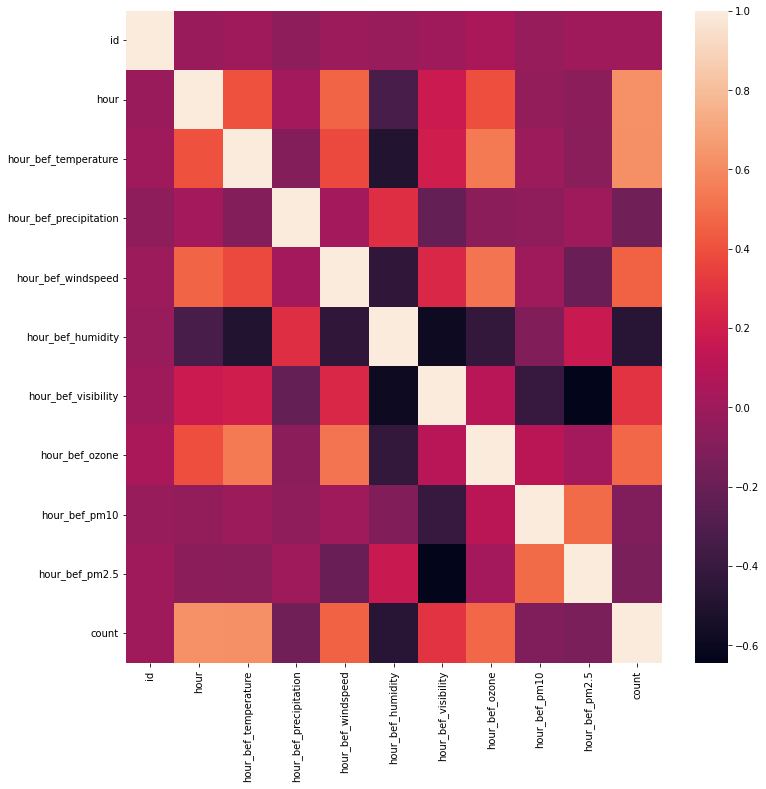

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(train.corr())

# 데이터 전처리

In [ ]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
# 결측치 0으로 채워줌
train = train.fillna(0)
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [ ]:
# 결측치를 평균값으로 채워줌
train['hour_bef_pm10'].fillna(value = train ['hour_bef_pm10'].mean())

0       76.0
1       73.0
2       32.0
3       75.0
4       27.0
        ... 
1454    37.0
1455    34.0
1456    30.0
1457    71.0
1458    38.0
Name: hour_bef_pm10, Length: 1459, dtype: float64

In [ ]:
test = test.fillna(0)

# 모델링

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = train.drop('count', axis = 1)
y = train['count']

# 모델 정의
model = RandomForestRegressor()

# 모델 학습
model.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pred = model.predict(test)

## 정답파일 내보내기

In [ ]:
# submission의 count 변수에 예측한 pred 값을 채워줌.
submission['count'] = pred

# to_csv 메소드를 이용해 데이터 저장, index = False 옵션 항상 사용.
submission.to_csv('random.csv', index = False)

## K-fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
# n_splits = 5 -> 데이터를 5등분, random_state -> 랜덤 시드
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [ ]:
model = RandomForestRegressor(random_state = 0)

valid_score = []
test_predictions = []

In [ ]:
for train_idx, valid_idx in kf.split(X,y):
  x_train = X.iloc[train_idx]
  y_train = y.iloc[train_idx]

  x_valid = X.iloc[valid_idx]
  y_valid = y.iloc[valid_idx]

  model.fit(x_train,y_train)

  valid_prediction = model.predict(x_valid)
  score = mean_squared_error(y_valid, valid_prediction) ** 0.5
  valid_score.append(score)
  print(score)
print('평균 점수 : ', np.mean(valid_score))

36.87975837884776
40.98616549503382
36.215308137487256
41.49866007491927
39.33966734485847
평균 점수 :  38.983911886229315


In [ ]:
for train_idx, valid_idx in kf.split(X,y):
  x_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  x_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(x_tr,y_tr)

  test_prediction = model.predict(test)
  test_predictions.append(test_prediction)

In [ ]:

test_predictions = pd.DataFrame(test_predictions)
test_predictions

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714
0,112.50,215.34,102.83,27.82,72.95,115.11,168.84,304.63,30.46,116.47,284.06,223.63,109.31,37.98,214.75,128.86,24.82,190.91,331.62,158.23,215.14,85.61,15.86,139.13,142.14,116.30,27.32,115.15,108.85,137.58,75.26,28.26,67.88,140.12,280.18,30.19,143.90,93.24,186.18,62.73,...,151.70,28.77,167.11,17.35,30.56,16.97,227.96,103.79,138.39,244.15,132.50,111.02,28.98,165.31,17.24,145.45,30.55,34.42,101.62,51.68,189.08,20.55,99.97,183.76,30.72,298.67,232.24,17.98,333.96,114.00,211.52,36.85,81.21,28.91,280.05,60.09,54.22,114.15,170.86,172.17
1,89.45,263.98,82.27,28.32,54.89,128.71,187.44,320.43,30.37,120.35,304.49,260.49,109.42,35.87,213.88,171.87,23.88,191.79,357.08,158.54,243.94,71.35,20.29,140.44,139.83,115.60,29.08,123.74,117.17,182.39,63.26,29.30,68.09,131.97,283.22,27.89,138.74,107.79,200.61,63.31,...,134.22,30.07,159.39,16.49,32.95,17.08,253.95,104.03,156.91,255.75,142.77,133.08,27.59,164.45,17.05,145.86,34.27,35.37,105.83,48.71,200.62,22.22,73.70,205.28,35.41,311.65,274.96,17.86,368.51,121.51,246.51,42.91,86.13,31.42,277.02,53.05,65.38,124.62,151.52,157.54
2,90.23,239.52,75.09,28.66,51.42,123.66,199.83,319.49,30.43,144.32,326.80,289.78,112.13,38.06,214.32,180.85,26.93,162.35,359.68,200.62,232.82,83.11,21.30,134.73,165.41,114.93,24.89,117.52,112.54,160.44,79.24,27.62,69.06,132.47,269.35,29.51,137.43,71.92,209.92,91.72,...,173.06,29.82,178.57,20.17,25.17,18.33,217.12,114.91,193.54,254.88,152.44,141.17,24.60,161.78,16.91,141.48,28.93,32.68,92.07,48.46,204.55,23.23,95.10,174.30,30.93,304.78,263.00,18.67,359.58,121.10,252.79,34.36,86.07,28.63,246.23,52.88,70.61,117.99,165.11,165.37
3,97.04,238.05,88.97,26.97,63.75,127.17,176.11,319.37,25.66,108.43,294.66,274.60,100.67,47.16,209.91,169.25,24.35,135.76,359.95,162.72,214.61,88.86,21.12,164.75,151.41,112.84,28.68,117.32,107.43,156.81,69.67,28.75,72.00,143.01,264.19,25.99,131.40,105.66,243.90,79.02,...,146.49,27.19,146.90,17.95,29.97,19.68,205.47,100.76,176.43,247.33,134.92,127.65,26.68,129.73,19.48,140.15,33.92,29.88,94.06,57.21,199.19,23.08,97.85,196.96,32.10,323.21,267.44,19.49,351.67,136.48,260.80,49.23,94.72,30.97,260.72,63.39,69.20,119.79,181.85,150.00
4,86.04,261.24,98.89,28.44,61.79,129.89,149.94,267.11,25.18,115.58,310.13,268.64,141.16,34.36,207.13,157.32,23.03,188.25,333.28,169.10,227.41,77.46,16.76,139.30,152.29,115.60,23.24,118.20,120.71,163.87,66.98,24.06,65.91,136.26,294.53,25.89,137.72,104.64,224.62,74.86,...,151.65,22.52,208.08,18.89,27.81,18.10,232.78,103.19,167.35,255.37,135.78,125.32,26.51,188.86,17.55,149.94,33.03,25.38,104.32,49.38,199.50,19.46,85.74,190.89,26.90,284.51,275.85,16.14,335.73,118.68,260.96,40.05,81.58,30.64,249.31,51.15,57.65,127.24,156.63,209.97


In [ ]:
test_predictions.mean()

0       95.052
1      243.626
2       89.610
3       28.042
4       60.960
        ...   
710     56.112
711     63.412
712    120.758
713    165.194
714    171.010
Length: 715, dtype: float64

In [ ]:
# submission의 count 변수에 예측한 pred 값을 채워줌.
submission['count'] = test_predictions.mean()

# to_csv 메소드를 이용해 데이터 저장, index = False 옵션 항상 사용.
submission.to_csv('random_kfold.csv', index = False)

## 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state = 2021)

params = {'n_estimators' : [100, 200, 300],
          'max_features' : [5, 7, 10,],
          'min_samples_leaf' : [1,3,5]}

grid_cv = GridSearchCV(model, param_grid = params, cv = 5, verbose = 1)

grid_cv.fit(X,y)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=2021,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
pred = grid_cv.predict(test)

In [ ]:
# submission의 count 변수에 예측한 pred 값을 채워줌.
submission['count'] = pred

# to_csv 메소드를 이용해 데이터 저장, index = False 옵션 항상 사용.
submission.to_csv('random_tune.csv', index = False)